In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [11]:
num_features = ["age", "income"]
cat_features = ["gender", "city"]

In [12]:
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

In [13]:
preprocessor = ColumnTransformer(([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
]))

In [14]:
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

In [15]:
param_grid = {
 'regressor__n_estimators': [50, 100, 200],
 'regressor__max_depth': [None, 10, 20],
 'regressor__min_samples_split': [2, 5]
}

In [25]:
from sklearn.model_selection import train_test_split
X_train_df, X_test_df, y_train, y_test = train_test_split(X_df, y, test_size=0.33, random_state=42)

In [27]:
from sklearn.datasets import make_classification
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=5, random_state=42)

# Create feature names
feature_names = [f'feature_{i}' for i in range(X.shape[1])]
X_df = pd.DataFrame(X, columns=feature_names)

# Define numeric and categorical columns
# Let's assume first 10 are numeric, next 10 are categorical just for demo
num_features = feature_names[:10]
cat_features = feature_names[10:]

# Create preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

# Create pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=42)

# Define hyperparameter grid
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20],
    'classifier__min_samples_split': [2, 5]
}

# Perform grid search
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=1)
grid_search.fit(X_train, y_train)

# Print results
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)


Best parameters: {'classifier__max_depth': 20, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best accuracy: 0.6842857142857143


In [28]:
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

Best Parameters: {'classifier__max_depth': 20, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best R2 Score: 0.6842857142857143


In [29]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [30]:
# Load dataset
df = sns.load_dataset("tips")

In [31]:
# Split features and target
X = df.drop("total_bill", axis=1)
y = df["total_bill"]

In [32]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Identify column types
categorical_cols = X.select_dtypes(include="object").columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns

In [34]:
# Define preprocessor
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])

In [35]:
# Create pipeline
pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

In [36]:
pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['tip', 'size'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object'))])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [37]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['tip', 'size'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object'))])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [38]:
y_pred = pipe.predict(X_test)

In [39]:
y_pred

array([27.86647917, 13.50768614, 21.86007167, 33.8086    , 13.50768614,
       13.50768614, 15.42566769, 13.90268983, 20.50314917, 21.13048012,
       21.13048012, 11.14779678, 15.17117511, 13.50768614,  9.9104    ,
       14.40573   , 23.66018571, 17.35757484, 13.90268983, 24.433     ,
       24.16683333, 23.688115  , 17.35757484, 11.14779678, 27.61494357,
       17.09858333, 11.5768    , 25.509925  , 21.86007167, 26.5451    ,
       23.66018571, 11.14779678, 20.87563333, 26.14090583, 27.61494357,
       28.10826357, 15.17117511, 32.2197    , 18.17035714, 13.50768614,
       10.3392    , 13.50768614, 16.31225348, 14.57425   , 13.50768614,
        8.174075  , 12.6251    , 20.27120833, 11.14779678])

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [45]:
from sklearn.metrics import accuracy_score, classification_report, \
confusion_matrix

In [46]:
# Load dataset
df = sns.load_dataset('tips')

In [48]:
# Features and target
X = df.drop('total_bill', axis=1)
y = df['total_bill'] > df['total_bill'].median() # Convert to binary classification for demo

In [49]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

In [50]:
# Identify columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include=['int64',
'float64']).columns.tolist()

In [51]:
# Pipelines
numeric_preprocessor = Pipeline([
 ('imputer', SimpleImputer(strategy='mean')),
 ('scaler', StandardScaler())
])
categorical_preprocessor = Pipeline([
 ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
 ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
 ('num', numeric_preprocessor, numerical_cols),
 ('cat', categorical_preprocessor, categorical_cols)
])

In [52]:
# Define models
models = {
 'Decision Tree': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier(),
 'Logistic Regression': LogisticRegression(max_iter=200)
}

In [53]:
# Dictionary to store results
results = {}

In [54]:
# Training and Evaluation with Pipeline
for name, model in models.items():
 print(f"\nTraining Model: {name}")


Training Model: Decision Tree

Training Model: Random Forest

Training Model: Logistic Regression


In [57]:
# Create pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor),('classifier', model)])

# Train model
pipe.fit(X_train, y_train)

# Predict on test data
y_pred = pipe.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

# Store results
results[name] = {
    'accuracy': accuracy,
    'classification_report': report,
    'confusion_matrix': matrix
}

print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{matrix}")

Accuracy: 0.7755
Classification Report:
              precision    recall  f1-score   support

       False       0.74      0.88      0.81        26
        True       0.83      0.65      0.73        23

    accuracy                           0.78        49
   macro avg       0.79      0.77      0.77        49
weighted avg       0.78      0.78      0.77        49

Confusion Matrix:
[[23  3]
 [ 8 15]]


In [59]:
# Fit
pipe.fit(X_train, y_train)

# Predict
train_pred = pipe.predict(X_train)
test_pred = pipe.predict(X_test)

In [60]:
 # Metrics
 train_acc = accuracy_score(y_train, train_pred)
 test_acc = accuracy_score(y_test, test_pred)

 results[name] = {
 'model': pipe,
 'train_accuracy': train_acc,
 'test_accuracy': test_acc,
 'train_predictions': train_pred,
 'test_predictions': test_pred,
 'confusion_matrix': confusion_matrix(y_test, test_pred),
 'classification_report': classification_report(y_test, test_pred)
 }

In [61]:
# Summary
print("\nMODEL PERFORMANCE SUMMARY:")
for name, info in results.items():
 print(f"\n=== {name} ===")
 print(f"Training Accuracy: {info['train_accuracy']:.4f}")
 print(f"Testing Accuracy: {info['test_accuracy']:.4f}")
 print("Confusion Matrix (Test):")
 print(info['confusion_matrix'])
 print("Classification Report (Test):")
 print(info['classification_report'])


MODEL PERFORMANCE SUMMARY:

=== Logistic Regression ===
Training Accuracy: 0.7487
Testing Accuracy: 0.7755
Confusion Matrix (Test):
[[23  3]
 [ 8 15]]
Classification Report (Test):
              precision    recall  f1-score   support

       False       0.74      0.88      0.81        26
        True       0.83      0.65      0.73        23

    accuracy                           0.78        49
   macro avg       0.79      0.77      0.77        49
weighted avg       0.78      0.78      0.77        49



In [63]:
# Best model by test accuracy
best_model = max(results.items(), key=lambda x: x[1]['test_accuracy'])
print(f"\nBest Model: {best_model[0]} with Test Accuracy: {best_model[1]['test_accuracy']:.4f}")


Best Model: Logistic Regression with Test Accuracy: 0.7755


In [64]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [65]:
# Define combined models with proper pipelines
randomcv_models = [
    (
        'Random Forest',
        Pipeline([
            ('preprocessor', preprocessor),  # your column transformer
            ('classifier', RandomForestClassifier(random_state=42))
        ]),
        {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [None, 10, 20],
            'classifier__min_samples_split': [2, 5],
            'classifier__min_samples_leaf': [1, 2],
            'classifier__bootstrap': [True, False]
        }
    ),
    (
        'Logistic Regression',
        Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', LogisticRegression(max_iter=200, random_state=42))
        ]),
        {
            'classifier__penalty': ['l2'],
            'classifier__C': [0.01, 0.1, 1.0, 10],
            'classifier__solver': ['liblinear', 'lbfgs']
        }
    )
]

In [66]:
model_param = {}

for name, model, params in randomcv_models:
    print(f"\nTuning: {name}")
    random = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=10,
        cv=3,
        n_jobs=-1,
        verbose=1,
        random_state=42
    )
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_
    print(f"Best Params for {name}:")
    print(random.best_params_)


Tuning: Random Forest
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Params for Random Forest:
{'classifier__n_estimators': 100, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': None, 'classifier__bootstrap': True}

Tuning: Logistic Regression
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Params for Logistic Regression:
{'classifier__solver': 'liblinear', 'classifier__penalty': 'l2', 'classifier__C': 1.0}


In [67]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [74]:
# Function to plot Lift Curve (LOC)
def plot_lift_curve(y_true, y_proba, model_name):
    df = pd.DataFrame({'y_true': y_true, 'y_score': y_proba})
    df = df.sort_values('y_score', ascending=False).reset_index(drop=True)
    df['cum_response'] = df['y_true'].cumsum()
    df['lift'] = df['cum_response'] / (np.arange(1, len(df) + 1))
    baseline = df['y_true'].sum() / len(df)
    df['lift_normalized'] = df['lift'] / baseline # Calculate normalized lift for plotting
    plt.plot(np.arange(len(df)) / len(df), df['lift_normalized'], label=model_name)
    plt.xlabel('Proportion of Sample')
    plt.ylabel('Lift')
    plt.title('Lift Curve (LOC)')
    plt.grid(True)

In [76]:
def plot_lift_curve(y_true, y_proba, model_name):
    df = pd.DataFrame({'y_true': y_true, 'y_score': y_proba})
    df = df.sort_values('y_score', ascending=False).reset_index(drop=True)
    df['cum_response'] = df['y_true'].cumsum()
    df['lift'] = df['cum_response'] / (np.arange(1, len(df) + 1))
    baseline = df['y_true'].sum() / len(df)
    df['lift_normalized'] = df['lift'] / baseline

    plt.plot(np.arange(len(df)) / len(df), df['lift_normalized'], label=model_name)
    plt.xlabel('Proportion of Sample')
    plt.ylabel('Lift')
    plt.title('Lift Curve (LOC)')
    plt.grid(True)

In [78]:
# Function to plot ROC and LOC curves
def evaluate_models_roc_loc(models, model_param, X_train, y_train, X_test, y_test):
    plt.figure(figsize=(14, 5))

    for name, model in models.items():
        print(f"\nEvaluating: {name}")

        # Get the best parameters from RandomizedSearchCV if available, otherwise use default
        params = model_param.get(name, {})

        # Create pipeline with the model and potentially best parameters
        pipe = Pipeline(steps=[('preprocessor', preprocessor), (name, model)]) # Use name as step name
        pipe.set_params(**params)

        # Train model
        pipe.fit(X_train, y_train)

        # Predict probabilities on test data
        if hasattr(pipe, 'predict_proba'):
            y_proba = pipe.predict_proba(X_test)[:, 1] # Get probabilities for the positive class
        else:
            # For models that don't have predict_proba (e.g., some regressors converted to classifiers)
            # you might need a different approach or skip plotting for these models
            print(f"Skipping ROC/Lift plot for {name} as it does not have predict_proba.")
            continue

        # Plot ROC curve
        # Assuming a plot_roc_curve function exists or will be defined
        # plot_roc_curve(y_test, y_proba, name) # Uncomment if plot_roc_curve is available

        # Plot Lift curve
        plot_lift_curve(y_test, y_proba, name)

    plt.subplot(1, 2, 1) # Adjust subplot index if adding ROC plot
    plt.legend()
    plt.title('Lift Curve (LOC)')

    # Add ROC plot if plot_roc_curve is implemented
    # plt.subplot(1, 2, 2) # Adjust subplot index
    # plt.legend()
    # plt.title('ROC Curve')

    plt.tight_layout()
    plt.show()

AUC Score for Random Forest: 0.779
AUC Score for Logistic Regression: 0.884


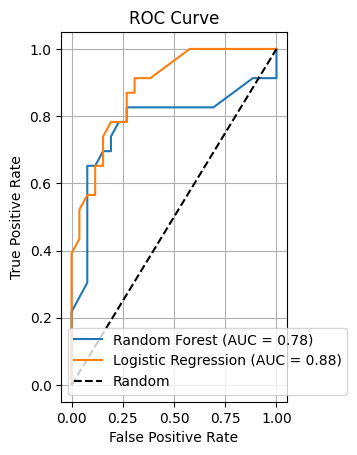

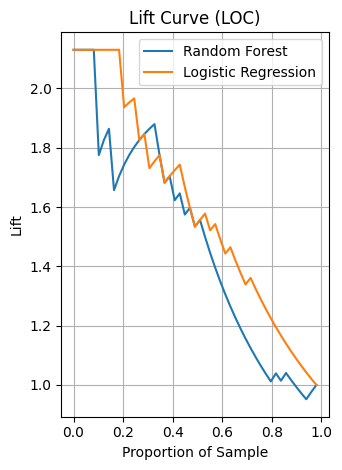

In [88]:
# ROC Plot
plt.subplot(1, 2, 1)
for name, model, _ in randomcv_models: # Iterate through randomcv_models
        # Get the best parameters from RandomizedSearchCV
        params = model_param.get(name, {})

        # Create pipeline with the model and best parameters
        pipe = Pipeline(steps=[('preprocessor', preprocessor), (name, model[1])]) # Use index 1 to get the model from the tuple

        # Update parameter keys to match the dynamic step name in the pipeline
        updated_params = {}
        for param_key, param_value in params.items():
            if param_key.startswith('classifier__'):
                new_key = param_key.replace('classifier__', f'{name}__')
                updated_params[new_key] = param_value
            else:
                updated_params[param_key] = param_value

        pipe.set_params(**updated_params)

        # Train model
        pipe.fit(X_train, y_train)

        # Predict probabilities on test data
        if hasattr(pipe, 'predict_proba'):
            y_proba = pipe.predict_proba(X_test)[:, 1] # Get probabilities for the positive class
        else:
            print(f"Skipping ROC plot for {name} as it does not have predict_proba.")
            continue

        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)

        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
        print(f'AUC Score for {name}: {auc:.3f}')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)

plt.show() # Add plt.show() here to display both plots together

# Lift Curve
plt.subplot(1, 2, 2)
for name, model, _ in randomcv_models:
    # Get the best parameters from RandomizedSearchCV
    params = model_param.get(name, {})

    # Create pipeline with the model and best parameters
    pipe = Pipeline(steps=[('preprocessor', preprocessor), (name, model[1])]) # Use index 1 to get the model from the tuple

    # Update parameter keys to match the dynamic step name in the pipeline
    updated_params = {}
    for param_key, param_value in params.items():
        if param_key.startswith('classifier__'):
            new_key = param_key.replace('classifier__', f'{name}__')
            updated_params[new_key] = param_value
        else:
            updated_params[param_key] = param_value

    pipe.set_params(**updated_params)

    # Train model
    pipe.fit(X_train, y_train)

    # Predict probabilities on test data
    if hasattr(pipe, 'predict_proba'):
        y_proba = pipe.predict_proba(X_test)[:, 1] # Get probabilities for the positive class
    else:
        print(f"Skipping Lift plot for {name} as it does not have predict_proba.")
        continue

    plot_lift_curve(y_test, y_proba, model_name=name)

plt.legend()
plt.tight_layout()